In [1]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [2]:
import pandas as pd
import numpy as np
import glob
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# ===============================
# 1️⃣ Parámetros
# ===============================
data_path =  "./data_final_v3"   # Ruta donde están los 500 CSV
k_feature_selection = 20    # Número de mejores features que deseas obtener


In [3]:
# ===============================
# 2️⃣ Cargar todos los archivos CSV en un solo DataFrame
# ===============================
all_files = glob.glob(f"{data_path}/*.csv")

dfs = []
for file in all_files:
    try:
        df = pd.read_csv(file)
        dfs.append(df)
    except Exception as e:
        print(f"Error al leer {file}: {e}")

df_full = pd.concat(dfs, ignore_index=True)
print(f"✅ Dataset combinado con {len(df_full)} filas y {len(df_full.columns)} columnas.")

ValueError: No objects to concatenate

In [ ]:
# ===============================
# 3️⃣ Eliminar columnas no deseadas (targets y sectores)
# ===============================
cols_to_remove = [
    "Target_3M_Return", 
    "Target_Direction"
] + [col for col in df_full.columns if col.startswith("Sector_")]

df_features = df_full.drop(columns=cols_to_remove, errors="ignore")

In [ ]:
# ===============================
# 4️⃣ Definir X (features) y y (target)
# ===============================
X = df_features.select_dtypes(include=[np.number]).fillna(0)
y = df_full["Target_3M_Return"].astype(int)  # Clasificación binaria 0/1


In [ ]:
X.shape

(418712, 85)

In [ ]:
# ===============================
# 5️⃣ Aplicar SelectKBest con mutual_info_classif
# ===============================
selector = SelectKBest(score_func=mutual_info_classif, k=k_feature_selection)
selector.fit(X, y)

SelectKBest(k=20, score_func=<function mutual_info_classif at 0x16e1753a0>)

In [ ]:
# ===============================
# 6️⃣ Obtener resultados ordenados
# ===============================
scores = selector.scores_
feature_scores = pd.DataFrame({
    "Feature": X.columns,
    "Score": scores
}).sort_values(by="Score", ascending=False)

print("\n🏆 Top features más relevantes:")
print(feature_scores.head(k_feature_selection))

# Si quieres guardar los resultados:
feature_scores.to_csv("feature_importance_global.csv", index=False)
print("\n📁 Resultados guardados en feature_importance_global.csv")



🏆 Top features más relevantes:
                                Feature     Score
35                                  ROE  0.335241
40                       Asset_Turnover  0.334589
36                                  ROA  0.334584
38                        Profit_Margin  0.334497
37                       Debt_to_Equity  0.334335
41                   Financial_Leverage  0.333672
42                             EPS_Calc  0.333182
49                      Changes_In_Cash  0.092371
78                  Net_Tangible_Assets  0.088491
7                                EMA_50  0.087105
3                                SMA_50  0.087087
70                         Common_Stock  0.086414
69                        Capital_Stock  0.086115
79                  Tangible_Book_Value  0.086061
83          Tax_Effect_Of_Unusual_Items  0.084907
46                  Financing_Cash_Flow  0.081342
45                  Investing_Cash_Flow  0.079356
56       Net_Income_Common_Stockholders  0.070776
51                

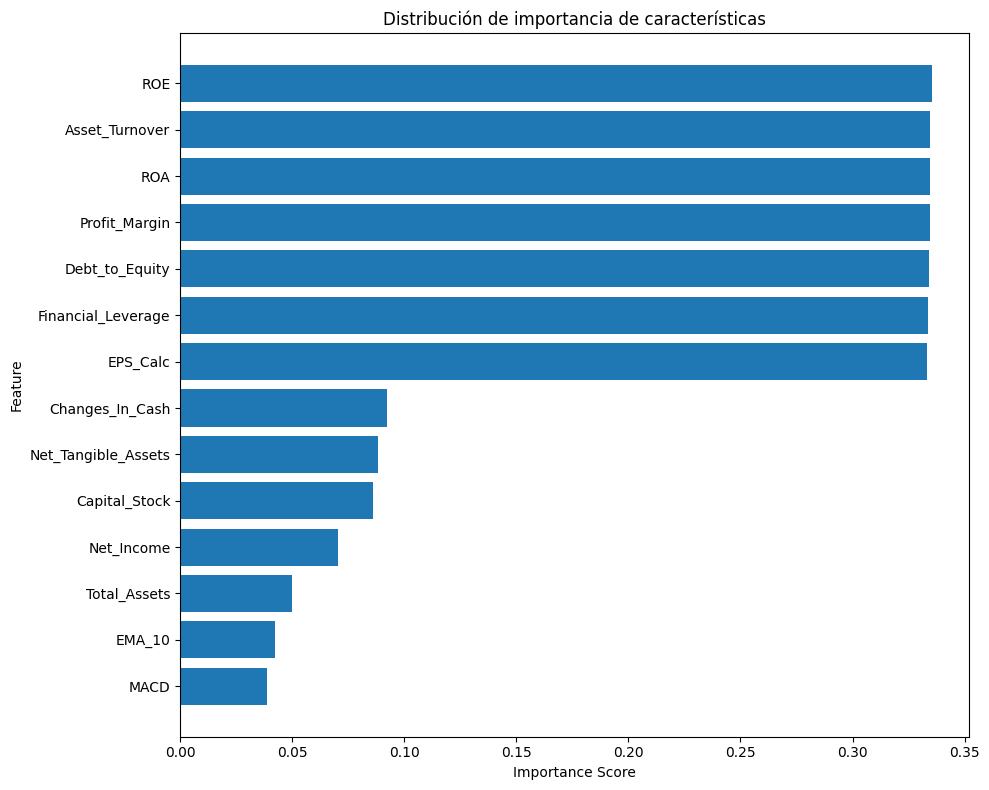

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar CSV
df = pd.read_csv("feature_importance_global.csv")

# 2. Ordenar por score (descendente)
df_sorted = df.sort_values(by="Score", ascending=False)

# 3. Seleccionar top 8
top8 = df_sorted.head(8)

# 4. Seleccionar 6 aleatorios del resto
rest = df_sorted.iloc[8:]  # todo excepto top 8
random6 = rest.sample(6, random_state=42)  # random_state para reproducibilidad

# 5. Combinar subconjuntos
df_plot = pd.concat([top8, random6]).sort_values(by="Score", ascending=True)

# 6. Graficar
plt.figure(figsize=(10, 8))
plt.barh(df_plot["Feature"], df_plot["Score"])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Distribución de importancia de características")
plt.tight_layout()

# 7. Guardar figura
plt.savefig("feature_importance.png", dpi=300, bbox_inches="tight")
plt.show()

